In [157]:
print("Hello World!")

import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 
from sklearn.preprocessing import StandardScaler



Hello World!


In [158]:
df = pd.read_csv("train.csv")

In [159]:
df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [160]:
df.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,37025.000000,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,21376.826729,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,18512.500000,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,37025.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,55537.500000,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,74050.000000,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


In [162]:
#examining sex

df["Sex"].value_counts()

M    27084
I    23957
F    23010
Name: Sex, dtype: int64

In [163]:
#changing column names to more typical notation

df.columns =  [item.lower() for item in df.columns]

In [164]:
df.columns =  [item.replace(" ", "_") for item in df.columns]

In [165]:
df.head()

,id,sex,length,diameter,height,weight,shucked_weight,viscera_weight,shell_weight,age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


Additional: Let's add dummy variables to our "sex" column

In [166]:
df = pd.get_dummies(df)

In [167]:
df

,id,length,diameter,height,weight,shucked_weight,viscera_weight,shell_weight,age,sex_F,sex_I,sex_M
0,0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,0,1,0
1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,0,1,0
2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,0,0,1
3,3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,1,0,0
4,4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
74046,74046,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10,1,0,0
74047,74047,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6,0,1,0
74048,74048,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10,1,0,0
74049,74049,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774,8,0,1,0


In [168]:
df = df[[i for i in df if i not in ["age"]]+["age"]]

In [169]:
df

,id,length,diameter,height,weight,shucked_weight,viscera_weight,shell_weight,sex_F,sex_I,sex_M,age
0,0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,0,1,0,9
1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,0,1,0,8
2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,0,0,1,9
3,3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,1,0,0,11
4,4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,0,1,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
74046,74046,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,1,0,0,10
74047,74047,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,0,1,0,6
74048,74048,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,1,0,0,10
74049,74049,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774,0,1,0,8


Our target variable is the age of the target. Let's look at the correlation matrix:

<AxesSubplot:>

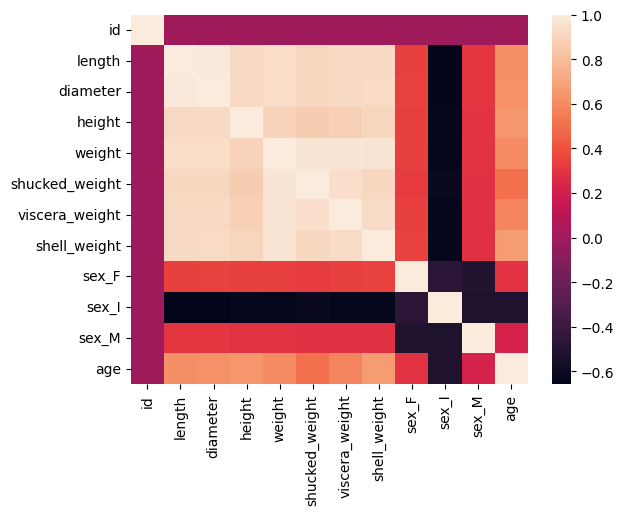

In [170]:
corr = df.corr()

sns.heatmap(corr)#, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}

So we have a large level of multicollinearity in our quantitative variables. We need to watch out for that.

It looks like our top correlations are:

-shell weight
-height
-diameter

This multicollinearity can be ignored 

In [171]:
corr.age.sort_values(ascending=False)

age               1.000000
shell_weight      0.663473
height            0.638067
diameter          0.621256
length            0.612843
weight            0.601195
viscera_weight    0.576808
shucked_weight    0.503320
sex_F             0.290494
sex_M             0.221978
id                0.000089
sex_I            -0.515909
Name: age, dtype: float64

In [172]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [173]:
X = df.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,id,1.000033
1,length,50.029779
2,diameter,52.539233
3,height,7.731302
4,weight,76.731708
5,shucked_weight,22.695252
6,viscera_weight,17.972278
7,shell_weight,20.256463
8,sex_F,30.163738
9,sex_I,25.569625


In [174]:
X1 = X.drop(["id", "diameter", "length", "weight"], axis = 1)

In [175]:
calc_vif(X1)

,variables,VIF
0,height,6.017386
1,shucked_weight,9.690240
2,viscera_weight,13.230793
3,shell_weight,10.435289
4,sex_F,13.362981
5,sex_I,9.649081
6,sex_M,15.067539


In [176]:
X1

,height,shucked_weight,viscera_weight,shell_weight,sex_F,sex_I,sex_M
0,0.3750,12.728926,6.647958,8.348928,0,1,0
1,0.2750,4.521745,2.324659,3.401940,0,1,0
2,0.3750,11.339800,5.556502,6.662133,0,0,1
3,0.5000,20.354941,10.991839,14.996885,1,0,0
4,0.3375,11.977664,4.507570,5.953395,0,1,0
...,...,...,...,...,...,...,...
74046,0.4375,20.680960,10.361742,12.332033,1,0,0
74047,0.2750,4.323299,2.296310,3.543687,0,1,0
74048,0.4125,12.303683,7.540967,8.079607,1,0,0
74049,0.3125,8.972617,2.919999,4.280774,0,1,0


Now train-test split/linear regression:

In [177]:
y = df.age

In [178]:
X1

,height,shucked_weight,viscera_weight,shell_weight,sex_F,sex_I,sex_M
0,0.3750,12.728926,6.647958,8.348928,0,1,0
1,0.2750,4.521745,2.324659,3.401940,0,1,0
2,0.3750,11.339800,5.556502,6.662133,0,0,1
3,0.5000,20.354941,10.991839,14.996885,1,0,0
4,0.3375,11.977664,4.507570,5.953395,0,1,0
...,...,...,...,...,...,...,...
74046,0.4375,20.680960,10.361742,12.332033,1,0,0
74047,0.2750,4.323299,2.296310,3.543687,0,1,0
74048,0.4125,12.303683,7.540967,8.079607,1,0,0
74049,0.3125,8.972617,2.919999,4.280774,0,1,0


In [179]:


X_train, X_test, y_train, y_test = train_test_split(X1, y, random_state=23)

In [180]:
linreg = LinearRegression()

linfit = linreg.fit(X_train, y_train)

y_pred = linfit.predict(X_test)

In [181]:
r2 = r2_score(y_test, y_pred)

print(r2)

0.5332313322430107


In [182]:
def adjusted_r_squared(r_squared, X):
    adjusted_r2 = 1 - ((1 - r_squared) * (len(X) - 1) / (len(X) - X.shape[1] - 1))
    return adjusted_r2 

In [183]:
adjusted_r2 = adjusted_r_squared(r2, X_test)
print(adjusted_r2)

0.5330547647923596


In [184]:
X_test

,height,shucked_weight,viscera_weight,shell_weight,sex_F,sex_I,sex_M
4674,0.4125,12.658052,6.676307,8.221355,0,0,1
24903,0.4625,19.972223,9.681354,11.198052,1,0,0
68305,0.4125,12.402906,7.526792,9.638830,1,0,0
11279,0.5000,22.197658,10.872033,14.033003,0,0,1
3613,0.4625,15.308730,9.397859,11.623295,1,0,0
...,...,...,...,...,...,...,...
70517,0.3500,4.961163,2.253785,4.110678,1,0,0
45674,0.4500,17.846010,8.575724,12.034363,0,0,1
29514,0.4125,17.321545,8.022908,9.497082,1,0,0
59011,0.3750,8.873394,4.535920,5.953395,0,0,1


As an example, let's discuss how our r2 terms would look if we didn't throw so much out:

In [187]:
X = X.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)

linreg = LinearRegression()

linfit = linreg.fit(X_train, y_train)

y_pred = linfit.predict(X_test)

In [188]:
r2_orig = r2_score(y_test, y_pred)

adjusted_r2_orig = adjusted_r_squared(r2, X_test)

print(r2_orig)

print(adjusted_r2_orig)



0.5506204851973856
0.5329790521285598


So as predicted, our r2 was better, but our adjusted r2 suffered.

Let's try scaling X and seeing if it helps:

In [189]:
scaler = StandardScaler()

X1_scaled = pd.DataFrame(scaler.fit_transform(X1))
X1_scaled.columns = X1.columns
X1_scaled

,height,shucked_weight,viscera_weight,shell_weight,sex_F,sex_I,sex_M
0,0.292400,0.467188,0.569186,0.453376,-0.671427,1.446028,-0.759381
1,-0.794163,-0.993688,-0.978880,-0.926788,-0.671427,1.446028,-0.759381
2,0.292400,0.219924,0.178363,-0.017224,-0.671427,-0.691550,1.316861
3,1.650603,1.824616,2.124622,2.308095,1.489365,-0.691550,-0.759381
4,-0.115061,0.333464,-0.197233,-0.214955,-0.671427,1.446028,-0.759381
...,...,...,...,...,...,...,...
74046,0.971501,1.882648,1.899000,1.564626,1.489365,-0.691550,-0.759381
74047,-0.794163,-1.029011,-0.989031,-0.887242,-0.671427,1.446028,-0.759381
74048,0.699861,0.391495,0.888951,0.378238,1.489365,-0.691550,-0.759381
74049,-0.386702,-0.201434,-0.765703,-0.681601,-0.671427,1.446028,-0.759381


In [190]:
X_train, X_test, y_train, y_test = train_test_split(X1_scaled, y, random_state=23)

linreg = LinearRegression()

linfit = linreg.fit(X_train, y_train)

y_pred = linfit.predict(X_test)

In [191]:
r2_scaled = r2_score(y_test, y_pred)

adjusted_r2_scaled = adjusted_r_squared(r2_scaled, X_test)

print("r2_scaled", r2_scaled)

print("adjusted_r2_scaled", adjusted_r2_scaled)

r2_scaled 0.5332313322430107
adjusted_r2_scaled 0.5330547647923596


Finally, since our target variables are integers, let's change our y_pred to integers:

In [192]:
y_pred_rounded = y_pred.round()
y_pred_rounded

array([11., 11., 13., ..., 10., 10.,  6.])

In [193]:
r2_scaled_rounded = r2_score(y_test, y_pred_rounded)

adjusted_r2_scaled_rounded = adjusted_r_squared(r2_scaled_rounded, X_test)

print("r2_scaled", r2_scaled_rounded)

print("adjusted_r2_scaled", adjusted_r2_scaled_rounded)

r2_scaled 0.5270402235053038
adjusted_r2_scaled 0.5268613141059273


So our best result is a scaled, unrounded y_measurement, with 

r2_scaled: 0.5332313322430107

adjusted_r2_scaled: 0.5330547647923596

Optional: corr matrix of scaled matrix

In [196]:
X1_scaled_corr = X1_scaled
X1_scaled_corr["age"] = y
X1_scaled_corr

,height,shucked_weight,viscera_weight,shell_weight,sex_F,sex_I,sex_M,age
0,0.292400,0.467188,0.569186,0.453376,-0.671427,1.446028,-0.759381,9
1,-0.794163,-0.993688,-0.978880,-0.926788,-0.671427,1.446028,-0.759381,8
2,0.292400,0.219924,0.178363,-0.017224,-0.671427,-0.691550,1.316861,9
3,1.650603,1.824616,2.124622,2.308095,1.489365,-0.691550,-0.759381,11
4,-0.115061,0.333464,-0.197233,-0.214955,-0.671427,1.446028,-0.759381,8
...,...,...,...,...,...,...,...,...
74046,0.971501,1.882648,1.899000,1.564626,1.489365,-0.691550,-0.759381,10
74047,-0.794163,-1.029011,-0.989031,-0.887242,-0.671427,1.446028,-0.759381,6
74048,0.699861,0.391495,0.888951,0.378238,1.489365,-0.691550,-0.759381,10
74049,-0.386702,-0.201434,-0.765703,-0.681601,-0.671427,1.446028,-0.759381,8


<AxesSubplot:>

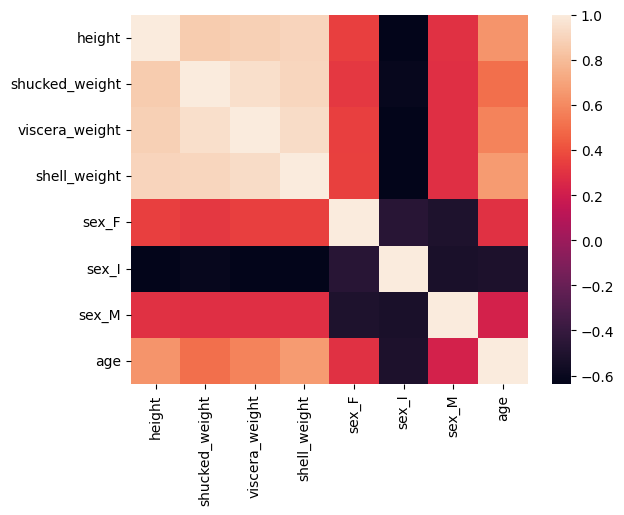

In [197]:
corr2 = X1_scaled_corr.corr()

sns.heatmap(corr2)

In [198]:
corr2.age

height            0.638067
shucked_weight    0.503320
viscera_weight    0.576808
shell_weight      0.663473
sex_F             0.290494
sex_I            -0.515909
sex_M             0.221978
age               1.000000
Name: age, dtype: float64

Ideas for tomorrow:

- Try KNN and Forwards/Backwards Regression to increase accuracy
- Increase number of regression metrics (SMAPE, etc)